In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()
df.shape

(200, 2)

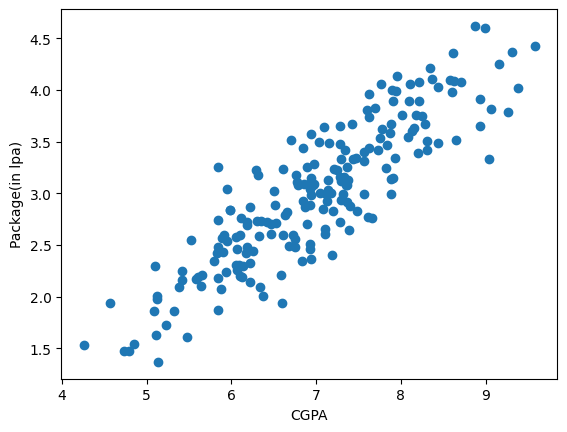

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [30]:
X= df.iloc[:,0:1]
y = df.iloc[:,-1]

In [31]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in lpa)')

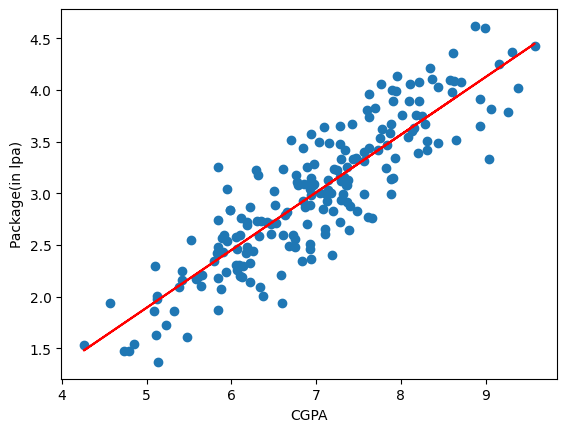

In [42]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [43]:
m=lr.coef_
b=lr.intercept_

print("Slope: ",m)
print("Intercept: ",b)

Slope:  [0.55795197]
Intercept:  -0.8961119222429144


In [49]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

y:\CODIII\Journey\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [46]:
X_test.head(3)

,cgpa
112,8.58
29,7.15
182,5.88


In [ ]:
y=(m*7.15)

y

array([3.98935661])

In [36]:
y_pred = lr.predict(X_test)

In [37]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [1]:
y_train.values

NameError: name 'y_train' is not defined

In [27]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [28]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [29]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [31]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [33]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [34]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [157]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.309720,3.26
1,5.12,0.302370,1.98
2,7.82,0.171968,3.25
3,7.42,0.585555,3.67
4,6.94,0.171229,3.57


Text(0, 0.5, 'Package(in lpa)')

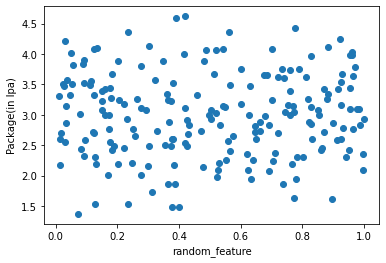

In [42]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [50]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_test)

In [55]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.781133851209665


In [56]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7693032485723497

In [148]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [149]:
new_df2.sample(5)

,cgpa,iq,package
42,5.95,2.44,2.54
180,6.19,1.52,2.72
38,8.62,5.06,4.36
23,6.19,2.38,2.48
98,7.69,3.83,3.83


Text(0, 0.5, 'Package(in lpa)')

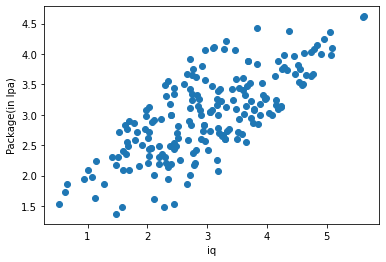

In [150]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [126]:
np.random.randint(-100,100)

44

In [151]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [154]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [155]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8000928965773431


In [ ]:
#adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7892871072031453